<figure>
  <IMG SRC="https://raw.githubusercontent.com/mbakker7/exploratory_computing_with_python/master/tudelft_logo.png" WIDTH=250 ALIGN="right">
</figure>

# Exploratory Computing with Python
*Developed by Mark Bakker*
## Statistics Notebook 1: Discrete random variables

This is the first Notebook with applications of Python programming to the field of probability and statisics. Many of the functions we will use are included in the `random` package, which is a subpackage of the `numpy` package, and is loaded automatically when the `pylab` mode is started. All functions from the random package will be called with the dot-syntax. So to call the function named `func` from the `random` package, we call the function `random.func`. 

In [1]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib




###Random numbers
A random number generator lets you draw, at random, a number from a specified distribution. Several random number generators are included in the `random` package. For example, the `random_integers(low,high,size)` function returns an integer array of shape `size` at random from `low` up to *and including* `high`. For example, let's flip a coin 10 times and assign a 0 to heads and a 1 to tails.

In [2]:
random.randint(0,1,10)

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

If we call the `randint` function again, we get a different sequence of heads (zeros) and tails (ones):

In [3]:
random.randint(0,1,10)

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

Internally, the random number generator starts with what is called a *seed*. The seed is a number and is generated automatically (and supposedly at random) when you call the random number generator. The value of the seed exactly defines the sequence of random numbers that you get (so some people may argue that the generated sequence is at best pseudo-random, and you may not want to use the sequence for any serious cryptographic use, but for our purposes they are random enough). For example, let's set `seed` equal to 10

In [4]:
random.seed(10)
random.randint(0,1,10)

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

If we now specify the seed again as 10, we can generate the exact same sequence

In [5]:
random.seed(10)
random.randint(0,1,10)

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

The ability to generate the exact same sequence is useful during code development. By seeding the random number generator, you can compare your output to output of others trying to solve the same problem.

###Flipping a coin
Enough for now about random number generators. Let's flip a coin 100 times and count the number of heads (0-s) and the number of tails (1-s):

In [6]:
flip = random.randint(0,1,100)
headcount = 0
tailcount = 0
for i in range(100):
    if flip[i] == 0:
        headcount += 1
    else:
        tailcount += 1
print('number of heads: ',headcount)
print('number of tails: ',tailcount)

number of heads:  100
number of tails:  0


First of all, note that the number of heads and the number of tails add up to 100. Also, note how we counted the heads and tails. We created counters `headcount` and `tailcount`, looped through all flips, and added 1 to the appropriate counter. Rather than the loop, we could have used condition for the indices combined with a summation as follows

In [7]:
headcount = sum( flip == 0 )
tailcount = sum( flip == 1 )
print('headcount ',headcount)
print('tailcount ',tailcount)

headcount  100
tailcount  0


How does that works? You may recall that the `flip == 0` statement returns an array with length 100 (equal to the lenght of `flip`) with the value `True` when the condition is met, and `False` when the condition is not met. The boolean `True` has the value 1, and the boolean `False` has the value 0. So when we sum all values in the array `flip == 0`, we sum all `True` values, where every `True` value is equal to 1.

The code above is easy, but if we do an experiment with more than 2 outcomes it may be cumbersome to do summation for every possible outcome. So let's try to rewrite this part of the code using a loop. For this specific case the number of lines of code doesn't decrease, but when we have an experiment with many different outcomes this will be much more efficient.

In [8]:
outcomes = zeros(2) # Two outcomes. outcome[0] is heads, outcome[1] is tails
for i in range (2):
    outcomes[i] = sum( flip == i )
    print('outcome ',i,' is ',outcomes[i])

outcome  0  is  100.0
outcome  1  is  0.0


###Exercise 1. <a name="back1"></a>Throwing a dice
Throw a dice 100 times and report how many times you throw 1, 2, 3, 4, 5, and 6. Use a seed of 33. Make sure that the reported values add up to 100. Make sure you use a loop in your code as we did in the previous code cell.

<a href="#ex1answer">Answers to Exercise 1</a>

###Flipping a coin twice
Next we are going to flip a coin twice for 100 times and count the number of tails. We generate a random array of 0-s (heads) and 1-s (tails) with two columns (representing two coin flips) and 100 rows. The sum of the two columns represents the number of tails. The `sum` function takes an array and by default sums all the values in the array and returns one number. In this case we want to sum the columns. For that, the `sum` function has a keyword argument called `axis`, where `axis=0` sums over index 0 of the array (the rows), `axis=1` sums over the index 1 of the array (the columns), etc for arrays with more than two dimensions.

In [9]:
flips = random.randint(low=0, high=1, size=(100,2))
tails = sum(flips, axis=1)
number_of_tails = zeros(3)
for i in range(3):
    number_of_tails[i] = sum( tails == i )
print(number_of_tails)

[ 100.    0.    0.]


Next we compute the experimental probability of 0 tails, 1 tail, and 2 tails through division by the total number of trials (one trial is two coin flips). The three probabilities add up to 1. The cumulative probability distribution is obtained by cumulatively summing the probabilities. The first value is the probability of throwing 0 tails. The second value is the probability of 1 or fewer tails, and the third value it the probability of 2 or fewer tails. Note that the probability is computed as the number of tails divided by the total number of trials. Note that `number_of_tails` has real values (not integers) so we can divide by the integer 100 and get the correct probability.

In [10]:
prob = number_of_tails / 100
cum_prob = cumsum(prob) # So cum_prob[0] = prob[0], cum_prob[1] = prob[0] + prob[1], etc.
print('cum_prob ',cum_prob)

cum_prob  [ 1.  1.  1.]


The cumulative probability distributions of a dataset is commonly plotted with a step function, which can be done by specifying the keyword `drawstyle='steps-post'` when using the plot function. To make the plot look good, we need to add an additional value of 0 at the beginning of the array and an additional value of 1 at the end of the array. For that, we use the `hstack` command, which stacks values or arrays together, one behind the other. Note that the values or arrays that need to be stacked together are grouped in a tuple (by putting parentheses around them). Finally, the limits of the y axis are extended a bit to make the graph look prettier. 

(-0.1, 1.1)

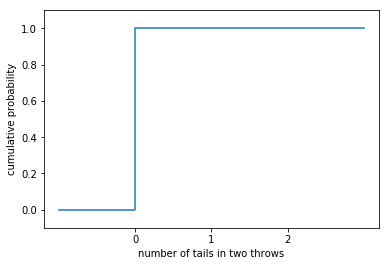

In [11]:
y = hstack((0,cum_prob,1))
plot([-1,0,1,2,3],y,drawstyle='steps-post')
xlabel('number of tails in two throws')
ylabel('cumulative probability')
xticks([0,1,2])
ylim(-0.1,1.1)

###Exercise 2. <a name="back2"></a>Flip a coin five times
Flip a coin five times in a row and record how many times you obtain heads (varying from 0-5). Perform the exeriment 1000 times. Make a graph with the total number of heads on the horizontal axis and the emperically computed probability to get that many heads, on the vertical axis. Execute your code several times (hit [shift]-[enter]) and see that the graph changes a bit every time, as the sequence of random numbers changes every time. 

Compute the cumulative probability. Print the values to the screen and make a plot of the cumulative probability function using a step graph.

<a href="#ex2answer">Answers to Exercise 2</a>

###Probability of a Bernouilli variable
In the previous exercise, we computed the probability of a certain number of heads in five flips experimentally. But we can, of course, compute the value exactly by using a few simple formulas. Consider the random variable $Y$, which is the outcome of an experiment with two possible values 0 and 1. Let $p$ be the "probability of success" $p=P(Y=1)$. 
Then $Y$ is said to be a Bernoulli variable. The experiment is repeated $n$ times and we define $X$ as the number of successes in the new experiment. The variable $X$ has a Binomial Distribution with parameters $n$ and $p$. The probability that $X$ takes value $k$ can be computed as (see Appendix A in the Statistics book by Dekking et al.)

$P(X=k) = \binom{n}{k}p^k(1-p)^{n-k}$

The term $\binom{n}{k}$ may be computed with the `comb` function, which needs to be imported from the `scipy.misc` package.

###Exercise 3. <a name="back3"></a>Flip a coin 5 times revisited
Go back to the experiment where we flip a coin five times in a row and record how many times we obtain heads.
Compute the theoretical probability for 0, 1, 2, 3, 4, and 5 heads and compare your answer to the probability computed from 1000 trials, 10000 trials, and 100000 trials. Do you approach the theoretical value with more trials?

<a href="#ex3answer">Answers to Exercise 3</a>

###Exercise 4. <a name="back4"></a>Maximum value of two dice throws
Throw a dice two times and record the maximum value of the two throws. Use the `amax` function to compute the maximum value. Like the `sum` function, the `amax` function (which stands for 'array maximum') takes an array as input argument and an optional keyword argument named `axis`. Perform the experiment 1000 times and compute the probability that the highest value is 1, 2, 3, 4, 5, or 6. Make a graph of the cumulative probability distribution function using a step graph.

<a href="#ex4answer">Answers to Exercise 4</a>

###Exercise 5. <a name="back5"></a>Maximum value of two dice throws revisited
Refer back to Exercise 4.
Compute the theoretical value of the probability of the highest dice when throwing the dice twice. There are 36 possible outcomes for this experiment. Let $M$ denote the random variable corresponding to this experiment (this means for instance that $M=3$ when your first throw is a 2, and the second throw is a 3). All outcomes of $M$ can easily be written down, see e.g., Table 4.2 in the Statistics book by Dekking et al. Use the 36 possible outcomes shown in the Table to compute the theoretical probability of $M$ being 1, 2, 3, 4, 5, or 6. Compare the theoretical outcome with the experimental outcome for 1000, 10000, and 100000 dice throws.

<a href="#ex5answer">Answers to Exercise 5</a>

###Generate random integers with non-equal probabilities
So far, we have generated random numbers of which the probability of each outcome was the same (heads or tails, or the numbers on a dice, considering the throwing device to be "fair"). What now if we want to generate outcomes that don't have the same probability. For example, consider the case where the probability of event $A$ is 0.35 and the probability of event $B$ is 0.65. A random sequence of events $A$ and $B$ is generated in two steps. First, we generate a sequence of random numbers from a uniform distribution between 0 and 1 with the `random_sample` function of the `random` package. Second, we record event $A$ (0) when the random number is less than 0.35 and we record event $B$ (1) when the random number is larger than 0.35. A sequence of ten events may be generated as follows

In [12]:
r = random.random_sample(10)
print(r)
events = zeros_like(r) # Creates an array of zeros the same size and type as r
events[ r > 0.35 ] = 1
print(events)

[ 0.77132064  0.02075195  0.63364823  0.74880388  0.49850701  0.22479665
  0.19806286  0.76053071  0.16911084  0.08833981]
[ 1.  0.  1.  1.  1.  0.  0.  1.  0.  0.]


###Exercise 6. <a name="back6"></a>Election poll
Consider an election where one million people will vote. 490,000 people will vote for candidate $A$ and 510,000 people will vote for candidate $B$. One day before the elections, the company of 'Maurice the Dog' conducts a pole among 1000 randomly chosen voters. We will investigate what the probability is that the Dog will predict the winner correctly. First, generate 1000 uniformly distributed values between 0 and 1 and count the number of values below 0.49 (votes for candidate $A$). Specify a seed of 50. If your code is correct, the number of people voting for candidate $A$ in the pole is 501, so the Dog will predict that candidate $A$ wins.

Next, perform the pole 1000 times. Count how many times candidate $A$ wins the pole and how may times candidate $B$ wins the pole. What is the probability that the Dog will predict the correct winner? And what is the probability that the Dog will predict a tie? Does the probability that the Dog will predict the correct winner increase significantly when he poles 5000 voters?

<a href="#ex6answer">Answers to Exercise 6</a>

###Answers to the exercises

<a name="ex1answer">Answers to Exercise 1</a>

In [13]:
random.seed(33)
dicethrow = random.randint(1,6,100)
side = zeros(6)
for i in range(6):
    side[i] = sum( dicethrow == i+1 )
    print('number of times ',i+1,' is ',side[i])
print('total number of throws ',sum(side))

number of times  1  is  19.0
number of times  2  is  17.0
number of times  3  is  17.0
number of times  4  is  28.0
number of times  5  is  19.0
number of times  6  is  0.0
total number of throws  100.0


<a href="#back1">Back to Exercise 1</a>

<a name="ex2answer">Answers to Exercise 2</a>

Text(0,0.5,'probability')

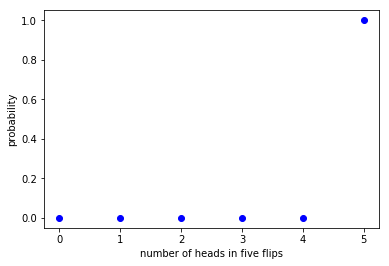

In [14]:
N = 1000
heads = -sum( random.randint(0,1,(1000,5))-1, 1 ) # Or simply call tails 0 and heads 1
countheads = zeros(6)
for i in range(6):
    countheads[i] = sum(heads==i)
plot( range(0,6), countheads/N, 'bo' )
xlabel('number of heads in five flips')
ylabel('probability')

cumprob: [ 0.  0.  0.  0.  0.  1.]


Text(0,0.5,'cumulative probability')

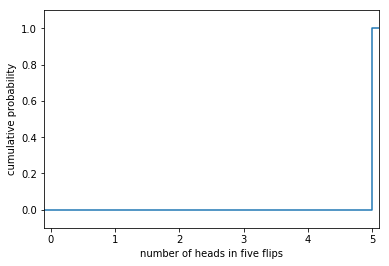

In [15]:
cumprob = cumsum(countheads/N)
print('cumprob:',cumprob)
y = hstack((0,cumprob,1))
plot(arange(-1,7),y,drawstyle='steps-post')
xlim(-0.1,5.1)
ylim(-0.1,1.1)
xlabel('number of heads in five flips')
ylabel('cumulative probability')

<a href="#back2">Back to Exercise 2</a>

<a name="ex3answer">Answers to Exercise 3</a>

In [16]:
from scipy.special import comb
print('Theoretical probabilities: ')
for k in range(6):
    print(k,' heads ', comb(5,k) * 0.5**k * 0.5**(5-k))
for N in (1000,10000,100000):
    heads = sum( random.randint(0,1,(N,5)), 1 )
    countheads = zeros(6)
    for i in range(6):
        countheads[i] = sum(heads==i)
    print('Probability with ',N,' trials: ',countheads / float(N))

Theoretical probabilities: 
0  heads  0.03125
1  heads  0.15625
2  heads  0.3125
3  heads  0.3125
4  heads  0.15625
5  heads  0.03125
Probability with  1000  trials:  [ 1.  0.  0.  0.  0.  0.]
Probability with  10000  trials:  [ 1.  0.  0.  0.  0.  0.]
Probability with  100000  trials:  [ 1.  0.  0.  0.  0.  0.]


<a href="#back3">Back to Exercise 3</a>

<a name="ex4answer">Answers to Exercise 4</a>

[ 0.029  0.161  0.366  0.636  1.     1.   ]


Text(0,0.5,'probability')

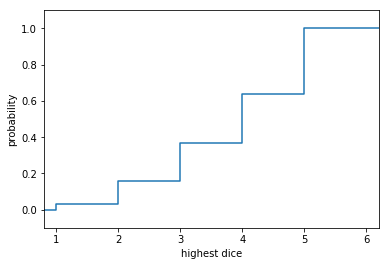

In [17]:
dice = random.randint(1,6,(1000,2))
highest_dice = amax(dice,1)
outcome = zeros(6)
for i in range(6):
    outcome[i] = sum(highest_dice==i+1) / float(1000)
y = hstack((0,cumsum(outcome),1))
plot(range(0,8),y,drawstyle='steps-post')
xlim(0.8,6.2)
ylim(-0.1,1.1)
print(cumsum(outcome))
xlabel('highest dice')
ylabel('probability')

<a href="#back4">Back to Exercise 4</a>

<a name="ex5answer">Answers to Exercise 5</a>

In [18]:
for N in [1000, 10000, 100000]:
    dice = random.randint(1,6,(N,2))
    highest_dice = amax(dice,1)
    outcome = zeros(6)
    for i in range(6):
        outcome[i] = sum(highest_dice==i+1) / float(N)
    print('Outcome for ',N,' throws: ',outcome)
# Exact values
exact = zeros(6)
for i,j in enumerate(range(1,12,2)):
    exact[i] = j / 36.0
print('Exact probabilities: ',exact)

Outcome for  1000  throws:  [ 0.038  0.121  0.203  0.274  0.364  0.   ]
Outcome for  10000  throws:  [ 0.0427  0.1201  0.2108  0.2754  0.351   0.    ]
Outcome for  100000  throws:  [ 0.04001  0.11959  0.19973  0.27995  0.36072  0.     ]
Exact probabilities:  [ 0.02777778  0.08333333  0.13888889  0.19444444  0.25        0.30555556]


<a href="#back5">Back to Exercise 5</a>

<a name="ex6answer">Answers to Exercise 6</a>

In [19]:
random.seed(50)
r = random.random_sample(1000)
votes_for_A = sum(r < 0.49)
print(votes_for_A)

501


In [20]:
Nlist = [1000,5000]
for N in Nlist:
    Awins = 0
    tie = 0
    for i in range(N):
        r = random.random_sample(N)
        if sum(r < 0.49) > N/2:
            Awins += 1
        elif sum(r < 0.49) == N/2:
            tie += 1
    print('Number of people in the pole: ',N)
    print('Probability the pole predicts candidate A will win: ',Awins/float(N))
    print('Probability the pole predicts a tie: ',tie/float(N))

Number of people in the pole:  1000
Probability the pole predicts candidate A will win:  0.268
Probability the pole predicts a tie:  0.024
Number of people in the pole:  5000
Probability the pole predicts candidate A will win:  0.0752
Probability the pole predicts a tie:  0.0046


<a href="#back6">Back to Exercise 6</a>